# MSDS 451: Financial Engineering - Programming Assignment 2



## Imports

In [68]:
import yfinance as yf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

## Data Preparation

In [69]:
start_date = '2005-01-01'
end_date = '2025-01-01'

startfile = "msds_prgm_assignment_2"

In [70]:
# Get finance data
symbols = ['KO', 'AAPL', 'AMZN', 'NFLX']

# Create an empty dictionary to store data for each ticker
historical_data = {}

# Fetch data for each symbol
for symbol in symbols:
    ticker = yf.Ticker(symbol)
    data = ticker.history(start='2005-01-01', end='2025-01-01')
    historical_data[symbol] = data
    # Save data to CSV
    data.to_csv(f"{startfile}_{symbol.lower()}.csv")

# Concatenate dataframes if needed for combined analysis
# combined_data = pd.concat(historical_data.values(), keys=historical_data.keys(), axis=1)

# Display head of the first ticker's data as an example
if historical_data:
    first_symbol = symbols[0]
    print(f"Head of historical data for {first_symbol}:")
    print(historical_data[first_symbol].head())
else:
    print("No data fetched for any symbols.")

Head of historical data for KO:
                                Open       High        Low      Close  \
Date                                                                    
2005-01-03 00:00:00-05:00  11.190054  11.208749  11.059191  11.093910   
2005-01-04 00:00:00-05:00  11.093914  11.123291  10.922992  10.939015   
2005-01-05 00:00:00-05:00  10.949694  11.003108  10.880258  10.888269   
2005-01-06 00:00:00-05:00  10.866905  10.989756  10.829516  10.979074   
2005-01-07 00:00:00-05:00  10.968388  11.072544  10.909633  10.992424   

                             Volume  Dividends  Stock Splits  
Date                                                          
2005-01-03 00:00:00-05:00  14072000        0.0           0.0  
2005-01-04 00:00:00-05:00  16860200        0.0           0.0  
2005-01-05 00:00:00-05:00  13271000        0.0           0.0  
2005-01-06 00:00:00-05:00  10038600        0.0           0.0  
2005-01-07 00:00:00-05:00   9732800        0.0           0.0  


## Initial Conditions - Dummy Assets

In [71]:
# Initial Conditions from jumpstart code
mean_returns_d = np.array([0.02, 0.07, 0.15, 0.20]) # mean returns for dummy assets A, B, C, and D

std_returns_d = np.array ([0.05, 0.12, 0.17, 0.25]) # std of returns for dummy assets A, B, C, and D

corr_matrix_d = np.array([[1.0, 0.3, 0.3, 0.3],
                          [0.3, 1.0, 0.6, 0.6],
                          [0.3, 0.6, 1.0, 0.6],
                          [0.3, 0.6, 0.6, 1.0]]) # correlation matrix for dummy assets A, B, C, and D

# Compute the covariance matrix for dummy assets A, B, C, and D
cov_matrix_d = np.diag(std_returns_d) @ corr_matrix_d @ np.diag(std_returns_d)

print("Covariance Matrix for Dummy Assets:")
print(cov_matrix_d)

Covariance Matrix for Dummy Assets:
[[0.0025  0.0018  0.00255 0.00375]
 [0.0018  0.0144  0.01224 0.018  ]
 [0.00255 0.01224 0.0289  0.0255 ]
 [0.00375 0.018   0.0255  0.0625 ]]


## Initial Conditions - Chosen Assets

In [72]:
# Initial Conditions for my chosen assets
# Calculating daily returns
daily_returns = {}
for symbol, data in historical_data.items():
    daily_returns[symbol] = data['Close'].pct_change()

print("Daily Returns for Each Ticker:")
for symbol, returns in daily_returns.items():
    print(f"\n{symbol} Daily Returns Head:")
    print(returns.head())

# Calculating mean returns
mean_returns = []
for symbol, returns in daily_returns.items():
    mean_returns.append(returns.mean())

print("\nMean Daily Returns for Each Ticker:")
print(mean_returns)

# Calculating std deviations
std_deviations = []
for symbol, returns in daily_returns.items():
    std_deviations.append(returns.std())

print("\nStandard Deviations of Daily Returns for Each Ticker:")
print(std_deviations)

Daily Returns for Each Ticker:

KO Daily Returns Head:
Date
2005-01-03 00:00:00-05:00         NaN
2005-01-04 00:00:00-05:00   -0.013962
2005-01-05 00:00:00-05:00   -0.004639
2005-01-06 00:00:00-05:00    0.008340
2005-01-07 00:00:00-05:00    0.001216
Name: Close, dtype: float64

AAPL Daily Returns Head:
Date
2005-01-03 00:00:00-05:00         NaN
2005-01-04 00:00:00-05:00    0.010270
2005-01-05 00:00:00-05:00    0.008758
2005-01-06 00:00:00-05:00    0.000776
2005-01-07 00:00:00-05:00    0.072811
Name: Close, dtype: float64

AMZN Daily Returns Head:
Date
2005-01-03 00:00:00-05:00         NaN
2005-01-04 00:00:00-05:00   -0.053459
2005-01-05 00:00:00-05:00   -0.008780
2005-01-06 00:00:00-05:00   -0.017237
2005-01-07 00:00:00-05:00    0.030938
Name: Close, dtype: float64

NFLX Daily Returns Head:
Date
2005-01-03 00:00:00-05:00         NaN
2005-01-04 00:00:00-05:00   -0.021812
2005-01-05 00:00:00-05:00   -0.039451
2005-01-06 00:00:00-05:00   -0.013393
2005-01-07 00:00:00-05:00    0.006335
Nam

In [73]:
# Calculating correlation matrix
daily_returns_df = pd.DataFrame(daily_returns)
correlation_matrix = daily_returns_df.corr()
print("Correlation Matrix of Daily Returns:")
print(correlation_matrix)

# Calculating covariance matrix
std_deviations_np = np.array(std_deviations)
std_matrix = np.diag(std_deviations_np)
covariance_matrix = std_matrix @ correlation_matrix @ std_matrix

print("\nCovariance Matrix of Daily Returns:")
print(covariance_matrix)

Correlation Matrix of Daily Returns:
            KO      AAPL      AMZN      NFLX
KO    1.000000  0.338218  0.275101  0.156942
AAPL  0.338218  1.000000  0.460838  0.298709
AMZN  0.275101  0.460838  1.000000  0.390394
NFLX  0.156942  0.298709  0.390394  1.000000

Covariance Matrix of Daily Returns:
          0         1         2         3
0  0.000130  0.000078  0.000075  0.000057
1  0.000078  0.000410  0.000223  0.000192
2  0.000075  0.000223  0.000570  0.000296
3  0.000057  0.000192  0.000296  0.001008


## Multivariate Normal Returns

In [74]:
# Parameters
from scipy.stats import multivariate_normal
num_return_sets = 700
random_seed = 42

In [75]:
# Generate multivariate normal returns for dummy assets
dummy_returns = multivariate_normal.rvs(mean=mean_returns_d, cov=cov_matrix_d, size=num_return_sets, random_state=random_seed)
#print("Generated Dummy Returns (first 5 rows):")
#print(dummy_returns[:5])

# Save dummy returns to a DataFrame
dummy_returns_df = pd.DataFrame(dummy_returns, columns=['A', 'B', 'C', 'D'])

print("Dummy Returns DataFrame (first 5 rows):")
print(dummy_returns_df.head())

Dummy Returns DataFrame (first 5 rows):
          A         B         C         D
0 -0.061474 -0.013791  0.120519  0.080242
1 -0.017127 -0.021878  0.254407  0.259281
2  0.049213  0.128672  0.142389  0.343641
3  0.057883  0.237506  0.258379 -0.006953
4  0.105517  0.213787  0.222509  0.452907


In [76]:
# Generate multivariate normal returns for chosen assets
asset_returns = multivariate_normal.rvs(mean=mean_returns, cov=covariance_matrix, size=num_return_sets, random_state=random_seed)

#print("Generated Chosen Asset Returns (first 5 rows):")
#print(asset_returns[:5])

# Save historical returns to a DataFrame
asset_returns_df = pd.DataFrame(asset_returns, columns=symbols)

print("Chosen Asset Returns DataFrame (first 5 rows):")
print(asset_returns_df.head())

Chosen Asset Returns DataFrame (first 5 rows):
         KO      AAPL      AMZN      NFLX
0 -0.017702 -0.007411  0.002202 -0.014836
1 -0.009221 -0.011385  0.024331  0.004732
2  0.005921  0.005288 -0.003536  0.022565
3  0.015298  0.040078  0.006993 -0.028722
4  0.019085  0.017369  0.003752  0.035720


## Compare and Contrast the Covariances and Correlations

In [77]:
# Comparing Dummy Data
print("Target Covariance Matrix for Dummy Assets:")
print(cov_matrix_d)

print("\nTarget Correlation Matrix for Dummy Assets:")
print(corr_matrix_d)
#

# Find actual matrices
actual_cov_matrix_d = np.cov(dummy_returns_df.T)
actual_corr_matrix_d = np.corrcoef(dummy_returns_df.T)

print("\nActual Covariance Matrix for Dummy Assets:")
print(actual_cov_matrix_d)

print("\nActual Correlation Matrix for Dummy Assets:")
print(actual_corr_matrix_d)
#

Target Covariance Matrix for Dummy Assets:
[[0.0025  0.0018  0.00255 0.00375]
 [0.0018  0.0144  0.01224 0.018  ]
 [0.00255 0.01224 0.0289  0.0255 ]
 [0.00375 0.018   0.0255  0.0625 ]]

Target Correlation Matrix for Dummy Assets:
[[1.  0.3 0.3 0.3]
 [0.3 1.  0.6 0.6]
 [0.3 0.6 1.  0.6]
 [0.3 0.6 0.6 1. ]]

Actual Covariance Matrix for Dummy Assets:
[[0.0025297  0.00168392 0.0023101  0.00322325]
 [0.00168392 0.01219431 0.00971141 0.01434427]
 [0.0023101  0.00971141 0.02686017 0.02195283]
 [0.00322325 0.01434427 0.02195283 0.05549889]]

Actual Correlation Matrix for Dummy Assets:
[[1.         0.30318557 0.28024766 0.27203047]
 [0.30318557 1.         0.53659799 0.55138851]
 [0.28024766 0.53659799 1.         0.56858319]
 [0.27203047 0.55138851 0.56858319 1.        ]]


In [78]:
# Comparing Chosen Historical Data
print("Target Covariance Matrix for Chosen Assets:")
print(covariance_matrix)

print("\nTarget Correlation Matrix for Chosen Assets:")
print(correlation_matrix)
#

# Find actual matrices
actual_cov_matrix = np.cov(asset_returns_df.T)
actual_corr_matrix = np.corrcoef(asset_returns_df.T)

print("\nActual Covariance Matrix for Chosen Assets:")
print(actual_cov_matrix)

print("\nActual Correlation Matrix for Chosen Assets:")
print(actual_corr_matrix)
#

Target Covariance Matrix for Chosen Assets:
          0         1         2         3
0  0.000130  0.000078  0.000075  0.000057
1  0.000078  0.000410  0.000223  0.000192
2  0.000075  0.000223  0.000570  0.000296
3  0.000057  0.000192  0.000296  0.001008

Target Correlation Matrix for Chosen Assets:
            KO      AAPL      AMZN      NFLX
KO    1.000000  0.338218  0.275101  0.156942
AAPL  0.338218  1.000000  0.460838  0.298709
AMZN  0.275101  0.460838  1.000000  0.390394
NFLX  0.156942  0.298709  0.390394  1.000000

Actual Covariance Matrix for Chosen Assets:
[[1.32771623e-04 7.27233508e-05 6.59375000e-05 4.26659426e-05]
 [7.27233508e-05 3.52915295e-04 1.81143946e-04 1.32473436e-04]
 [6.59375000e-05 1.81143946e-04 5.58225564e-04 2.50079130e-04]
 [4.26659426e-05 1.32473436e-04 2.50079130e-04 8.99618874e-04]]

Actual Correlation Matrix for Chosen Assets:
[[1.         0.33595879 0.24220047 0.12345237]
 [0.33595879 1.         0.4081161  0.23510631]
 [0.24220047 0.4081161  1.         0.

## Generate Weights and Returns for Portfolio

In [79]:
# Generate random sets of weights
num_portfolios = 700
num_assets = len(symbols)
shortsOK = True  # Set to True for short selling allowed, False otherwise

if shortsOK == True:
    weights = np.random.uniform(-1, 1, size=(num_portfolios, num_assets))
else:
    weights = np.random.uniform(0, 1, size=(num_portfolios, num_assets))
    weights = weights / np.sum(weights, axis=1)[:, np.newaxis] # Normalize weights to sum to 1

print("Generated Weights (first 5 rows):")
print(weights[:5])

Generated Weights (first 5 rows):
[[-0.07361537  0.44078989  0.20941429 -0.12914999]
 [ 0.02658602  0.81599759 -0.99143975  0.88574866]
 [-0.72376042  0.51222235 -0.56232428 -0.17872942]
 [ 0.51290471  0.06871107  0.8220206   0.8462017 ]
 [-0.50823479  0.69728256 -0.4563553  -0.09385726]]


In [80]:
# Calculate portfolio returns and volatility
portfolio_returns = []
portfolio_volatility = []
all_weights = []
position_status = [] # To store "Shorts Allowed" or "No Shorts"

for single_weights in weights:
    all_weights.append(single_weights)
    mean_returns_np = np.array(mean_returns)
    returns = np.dot(single_weights, mean_returns_np)
    portfolio_returns.append(returns)

    covariance_matrix_np = np.array(covariance_matrix)
    volatility = np.sqrt(single_weights.T @ covariance_matrix_np @ single_weights)
    portfolio_volatility.append(volatility)

    position_status.append("Shorts Allowed" if shortsOK else "No Shorts")


# Create a DataFrame for the portfolio results
portfolio_shorts_results_df = pd.DataFrame({
    'Return': portfolio_returns,
    'Volatility': portfolio_volatility,
    'Weights': all_weights,
    'Position': position_status
})


print("Portfolio Results DataFrame (Shorts Allowed):")
display(portfolio_shorts_results_df.head().T)

Portfolio Results DataFrame (Shorts Allowed):


,0,1,2,3,4
Return,0.000573,0.001448,-0.000604,0.002761,0.000001
Volatility,0.010915,0.031996,0.017384,0.041484,0.014278
Weights,"[-0.07361536605075814, 0.4407898931283256, 0.2...","[0.02658601572957986, 0.8159975925592031, -0.9...","[-0.7237604239472768, 0.512222345984557, -0.56...","[0.5129047051299438, 0.06871107206302174, 0.82...","[-0.5082347941576555, 0.6972825617701934, -0.4..."
Position,Shorts Allowed,Shorts Allowed,Shorts Allowed,Shorts Allowed,Shorts Allowed


In [81]:
# Display descriptive statistics for the portfolio results DataFrame
display(portfolio_shorts_results_df.describe())

,Return,Volatility
count,700.000000,700.000000
mean,0.000014,0.024958
std,0.001418,0.008466
min,-0.003761,0.002217
25%,-0.001033,0.019209
50%,-0.000079,0.024698
75%,0.001018,0.030068
max,0.004272,0.058043


## Same Process for Long Positions Only

In [85]:
# Generate random sets of weights
num_portfolios = 700
num_assets = len(symbols)
shortsOK = False  # Set to True for short selling allowed, False otherwise

if shortsOK == True:
    weights = np.random.uniform(-1, 1, size=(num_portfolios, num_assets))
else:
    weights = np.random.uniform(0, 1, size=(num_portfolios, num_assets))
    weights = weights / np.sum(weights, axis=1)[:, np.newaxis] # Normalize weights to sum to 1

print("Generated Weights (first 5 rows):")
print(weights[:5])

Generated Weights (first 5 rows):
[[0.29218538 0.13473627 0.19161386 0.38146449]
 [0.41778105 0.03337421 0.05611207 0.49273267]
 [0.12983325 0.09561712 0.38148631 0.39306332]
 [0.47468433 0.13819196 0.23704583 0.15007788]
 [0.30373126 0.26689777 0.07524599 0.35412497]]


In [86]:
# Calculate portfolio returns and volatility
portfolio_returns = []
portfolio_volatility = []
all_weights = []
position_status = [] # To store "Shorts Allowed" or "No Shorts"

for single_weights in weights:
    all_weights.append(single_weights)
    mean_returns_np = np.array(mean_returns)
    returns = np.dot(single_weights, mean_returns_np)
    portfolio_returns.append(returns)

    covariance_matrix_np = np.array(covariance_matrix)
    volatility = np.sqrt(single_weights.T @ covariance_matrix_np @ single_weights)
    portfolio_volatility.append(volatility)

    position_status.append("Shorts Allowed" if shortsOK else "No Shorts")


# Create a DataFrame for the portfolio results
portfolio_long_results_df = pd.DataFrame({
    'Return': portfolio_returns,
    'Volatility': portfolio_volatility,
    'Weights': all_weights,
    'Position': position_status
})


print("Portfolio Results DataFrame (No Shorts):")
display(portfolio_long_results_df.head().T)

Portfolio Results DataFrame (No Shorts):


,0,1,2,3,4
Return,0.001192,0.001142,0.001322,0.000919,0.001183
Volatility,0.016969,0.017956,0.019476,0.013071,0.016132
Weights,"[0.29218537782189136, 0.13473627457124995, 0.1...","[0.41778104950297834, 0.033374208567982046, 0....","[0.12983324883106173, 0.09561711905450737, 0.3...","[0.47468433028513635, 0.13819196062262099, 0.2...","[0.30373126202425454, 0.266897769154067, 0.075..."
Position,No Shorts,No Shorts,No Shorts,No Shorts,No Shorts


In [87]:
# Display descriptive statistics for the portfolio results DataFrame
display(portfolio_long_results_df.describe())

,Return,Volatility
count,700.000000,700.000000
mean,0.001165,0.016533
std,0.000159,0.002355
min,0.000550,0.011103
25%,0.001057,0.014726
50%,0.001167,0.016212
75%,0.001285,0.018023
max,0.001653,0.028769


## Visualizations for Different Position Scenarios

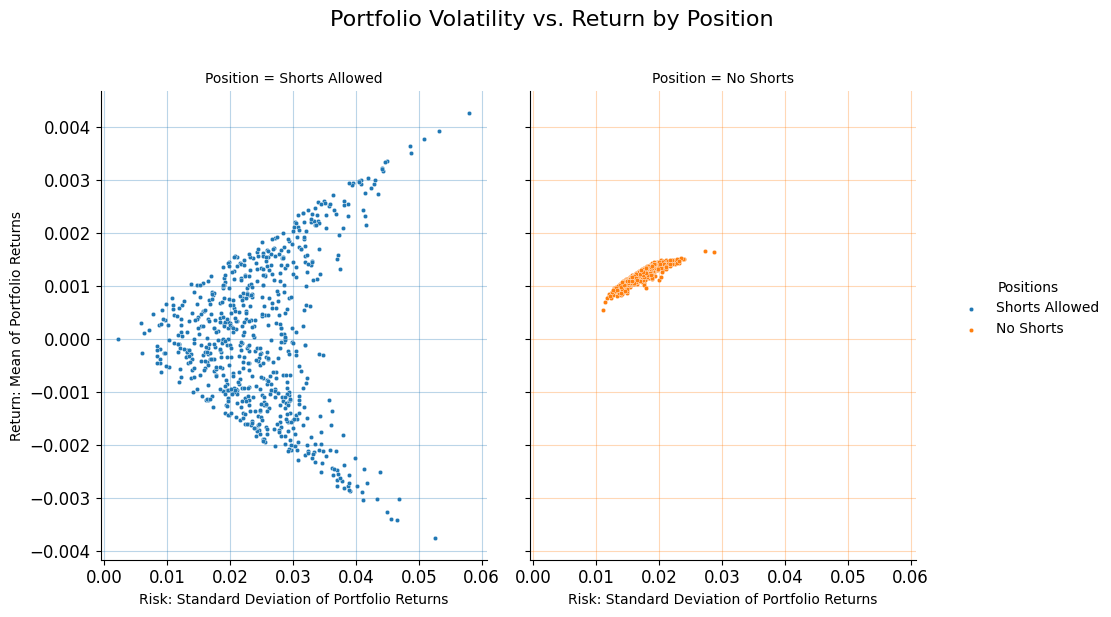

In [92]:
# Merge the two dataframes
plottingFrame = pd.concat([portfolio_shorts_results_df, portfolio_long_results_df])

# Use FacetGrid for side-by-side plots
g = sns.FacetGrid(plottingFrame, col='Position', hue='Position', height=6, aspect=0.8)
g.map(sns.scatterplot, 'Volatility', 'Return', s=10)

# Add titles and labels
g.fig.suptitle('Portfolio Volatility vs. Return by Position', y=1.02, fontsize=16)
g.set_axis_labels("Risk: Standard Deviation of Portfolio Returns", "Return: Mean of Portfolio Returns")
g.add_legend(title='Positions')

for ax in g.axes.flat:
    ax.tick_params(axis='both', which='major', labelsize=12)

# Add grid
g.map(plt.grid, axis='both', alpha=.3) # Add grid to each subplot

# Print plot (equivalent to print(facetPlot))
plt.show()